In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import iminuit as minuit


import scipy
from matplotlib import gridspec

from scipy.signal import find_peaks
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare
from iminuit import cost

In [7]:
### reading rutherfords
def readRuth(filename, detector):
    """ print comment lines from the lmd file """
    print('File:', filename)
    comments = []
    with open(filename) as ff:
        lines = ff.readlines()
        start = pd.to_datetime(lines[14][6:-1])
        commentlength = int(lines[17][-3:-1])
        print(commentlength, start)
        for i in range(0,commentlength):
            comments.append(lines[19+i][9:-1])
        print(comments)
    
    """ C1 data has a chopper flag column, DS and C2 don't """
    if detector == 'RuthE':
        temp = pd.read_csv(filename, sep = '\t', skiprows = 19+commentlength, header = None, usecols = np.arange(0,5))
        temp.columns = ['name', 'det', 't', 'evt_num', 'Ruth']
        
        
    return temp, start

File: run231_078_output_Ruth.txt
3 2020-03-28 05:55:14
[' mpod = 292/1+', ' c3f6 in the trap', ' start at 8:13am']


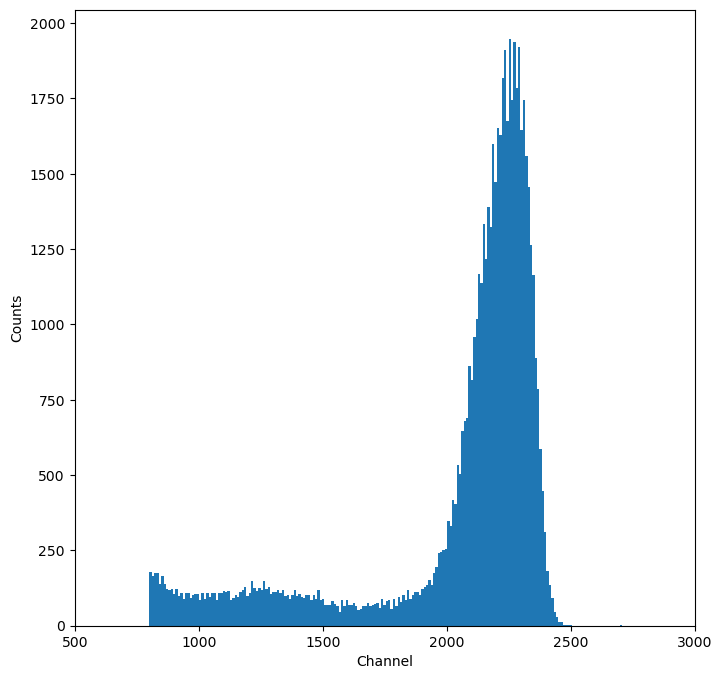

In [17]:
df, t1 = readRuth('run231_078_output_Ruth.txt', 'RuthE')

### checking histogram

plt.figure(figsize = (8,8))
plt.hist(df['Ruth'], bins = 200)
plt.xlim(500,3000)
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.show()




In [20]:
### checking # of entries

RuthCounts = len(df["Ruth"])
print (RuthCounts)

print(" Entries in Elog = %0.1f" % (59403))


62762
 Entries in Elog = 59403.0
